# Computational astrophy test site:

co owned by Sara Kok, Maria Georganti and Athul Muralidhar Jan, 2018

This source code is written in Python-3
All values in AU, Solar system units

# Initial imports:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Stage-1: Sun-Jupiter one body system (r,$\theta$) | astroids: 0


<IPython.core.display.Javascript object>


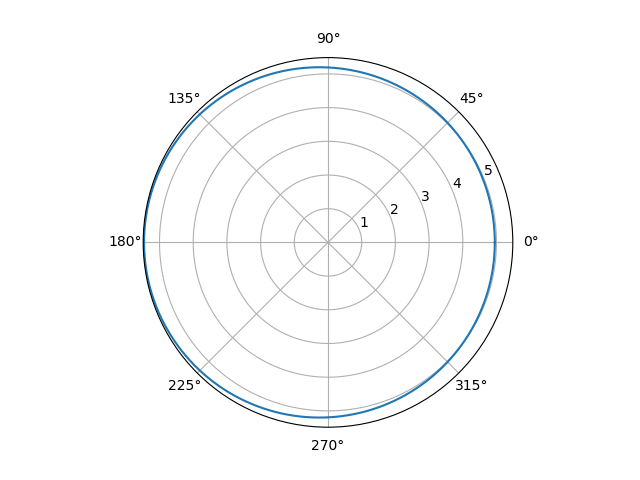

'\nreferences:\nhttps://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html\nhttps://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion\n'

In [30]:

cos = np.cos
pi = np.pi

a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter
theta = np.linspace(0, 2*pi, 360) # degrees
r = (a*(1-e**2))/(1+e*cos(theta)) # Kepler's law for orbits
 
plt.polar(theta, r)
plt.show()

"""
references:
https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion
"""


<IPython.core.display.Javascript object>


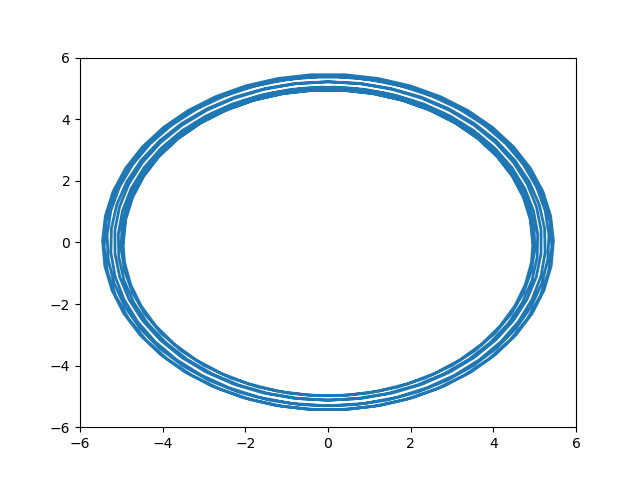

0.04124045372009277


In [24]:
from time import time
from matplotlib import animation

s = time()
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


cos = np.cos
sin = np.sin
pi = np.pi

a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter
theta = np.linspace(0, 2*pi, 360) # degrees
r = (a*(1-e**2))/(1+e*cos(theta)) # Kepler's law for orbits


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-6, 6), ylim=(-6, 6))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = r*cos(theta*0.1*i)
    y = r*sin(theta*0.1*i)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

e = time()
print(e-s)
